# KMeans
- numpy 可以 d[x範圍,y範圍]，直接取範圍
- from sklearn.cluster import KMeans
- 步驟： 
   - kmeans.fit(純features)
   - kmeans.cluster_centers_ : 群得個各群的群鑫位置（有多少特徵就有多少維度座標）
   - kmeans.labels 每筆資料被分到哪一筆，用數值代表，如分四群則（0,1,2,3），可以原本的有label資料的value比較，不過真實世界是很少這樣


- <font color="red">演算法概念</font>
    - step1: 根據 Domain Knowledge 分成 K 群，並隨機設定k個群心
    - step2: 計算每個點與這些群心的距離，並且將該點歸入到離群心最短的那群
    - step3: 重新計算群心（透過向量...這裡可以探討），並重複step2
    - step4 ： 群心不再變動，分群完成
- <font color="red">如何挑選好的 k 值 (其實沒有最好的值，只有最佳的值)</font>
    - 透過 domain knowledge
    - 透過elbow method，利用SSE來衡量 k 值(SSE:代表該群內的每點對於該群心的距離)
       - 情境：當k值越大，代表誤差越小（SSE越小），所以k值要越大越好
       - 不，這樣會造成overfitting，所以是要找到某一個k值的時候，「 SSE有大幅下降變化 」 => 就可以選那個數值當做分群的數目
       - 可以從 2, 4,6,8開始找
       - 總結，當k值增加到某個值之後，誤差降低的變化量微小的時候，就可以選定那個值作為分群的數目

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from sklearn.datasets import make_blobs # 建立group型態的資料

In [2]:
# 回傳的內容為Tuple ([x,y],cluster編號)，make_blobs基本上也是分群
data=make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)

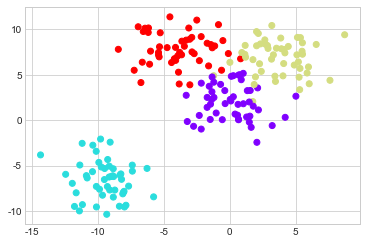

In [3]:
sns.set_style("whitegrid")
plt.scatter(x=data[0][:,0],y=data[0][:,1],c=data[1],cmap="rainbow")

# Machine Learning

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans=KMeans(n_clusters=2)

In [6]:
#直接fit特徵，也不用切割值，因為有不能預測
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
#取得每群的群心
kmeans.cluster_centers_

array([[-0.0336134 ,  5.54542558],
       [-9.46941837, -6.56081545]])

In [8]:
#把每筆資料分到哪一群吧，
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int32)

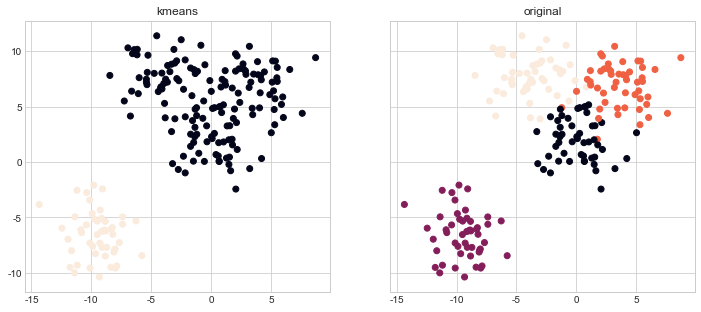

In [9]:
#可以直接繪圖區.繪圖類型 參數 share(x or y) 共用座標軸
fig , (ax1,ax2)=plt.subplots(1,2,figsize=(12,5),sharey=True)

ax1.set_title("kmeans")
ax1.scatter(x=data[0][:,0],y=data[0][:,1],c=kmeans.labels_)

ax2.set_title("original")
ax2.scatter(x=data[0][:,0],y=data[0][:,1],c=data[1])

In [10]:
from sklearn.grid_search import GridSearchCV

/Users/jiajiaping/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jiajiaping/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
parameters={"n_clusters":[1,2,3,4,5,6,7,8,9,10]}
grid=GridSearchCV(KMeans(),parameters)